In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner
from astropy.table import Table
import numpy.ma as ma
import matplotlib.colors

import sys
sys.path.insert(1,"/Users/nityaravi/Documents/Github/RotationCurves/spirals/")
from DRP_rotation_curve import extract_data
from DRP_vel_map_functions import build_map_mask, model_vel_map
from dark_matter_mass_v1_cython import rot_fit_BB, rot_fit_tail

In [2]:
matplotlib.rcParams['savefig.dpi'] = 300
matplotlib.rcParams['figure.dpi'] = 100

In [3]:
folder = '/Users/nityaravi/Documents/Research/RotationCurves/data/manga/output_files/DR17/CURRENT_MASTER_TABLE/'
fn = folder + 'H_alpha_HIvel_BB_extinction_H2_MxCG_R90_v3p5_Z_SFR_Portsmouthflux_Zglob.fits'
MANGA_FOLDER = '/Users/nityaravi/Documents/Research/RotationCurves/data/manga/'
NSA_FILENAME = '/Users/nityaravi/Documents/Research/RotationCurves/data/nsa_v1_0_1.fits'
VEL_MAP_FOLDER = MANGA_FOLDER + 'DR17/'

In [4]:
t = Table.read(fn, format='fits')
t_dict = {}
for i in range(0, len(t)):
    gal_ID = t['plateifu'][i]
    t_dict[gal_ID] = i
t[0]

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7],smoothness_score,nsa_elpetro_th90,v_sys,v_sys_err,ba,ba_err,x0,x0_err,y0,y0_err,phi,phi_err,v_max,v_max_err,r_turn,r_turn_err,chi2,alpha,alpha_err,Rmax,M,M_err,fit_flag,Sigma_disk,Sigma_disk_err,R_disk,R_disk_err,rho_bulge,rho_bulge_err,R_bulge,R_bulge_err,M90_disk,M90_disk_err,M_disk,M_disk_err,chi2_disk,logHI,logHIlim,WF50,WF50_err,DL_ttype,vis_tidal,b,b_err,M_R90,M_R90_err,fit_function,A_g,A_r,logH2,R90_kpc,v_3p5,v_3p5_err,NSA_plate,NSA_fiberID,NSA_MJD,logH2_CG,logH2_CG_err,logH2_M,Z,Z_err,M_Z,M_Z_err,grad_Z,grad_Z_err,Z_0,Z_0_err,SFR,sSFR,SFR_err,sSFR_err,Flux_OII_3726,Flux_OII_3726_Err,Flux_OII_3728,Flux_OII_3728_Err,Flux_OIII_4958,Flux_OIII_4958_Err,Flux_OIII_5006,Flux_OIII_5006_Err,Flux_NII_6547,Flux_NII_6547_Err,Flux_NII_6583,Flux_NII_6583_Err,Flux_Ha_6562,Flux_Ha_6562_Err,Flux_Hb_4861,Flux_Hb_4861_Err,CMD_class,rabsmag_NSA,param_H2,param_H2_err,Z_map,Z_err_map,M_Z_map,M_Z_err_map
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
10001,12701,10001-12701,1-48157,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,133.371090612,57.5984251446,159.27921887,38.8381829181,133.37109,57.598425,0.0545561,9,8100.81,0,20.0835,41.292,ma079,22,3,9114,134.41357,57.604214,1.10715,1.15321,1.21404,1.78219,1.85994,2.12685,0.898721,0.929654,0.937466,57372,57373,57373,2.69906,2.64546,2.59645,2.54039,2080,0,0,1,plateTargets-1.par,6013,J085329.03+573554.9,127,127,0,0.0392074,0.0193562,0.0264775,0.0386959,0.0429176,0.0193562,0.0264775,0.748562,-999.0,0.665321,0.705378,1.08789,1.19925,-999.0,0.6

In [24]:
t[np.logical_and(np.logical_and(t['v_max'] > 4000, t['WF50'] == -999), t['chi2'] <10)]['plateifu', 'v_max', 'ba', 'nsa_elpetro_ba', 'chi2']

plateifu,v_max,ba,nsa_elpetro_ba,chi2
bytes32,float64,float64,float64,float64
11011-3702,4528.858812747207,0.8849845861826917,0.65388304,9.565943379072223
11759-1902,5099.999213354415,0.9998771750554465,0.4516902,1.2631559767127694
11951-12702,4710.507576754028,0.9999364560803963,0.6921016,8.6131237682087
12069-12701,4450.582481619941,0.9996171809802287,0.6296883,2.9574219351776065
7968-3701,4065.101006308567,0.9997928778245463,0.966136,9.991303456423402
8148-12701,5060.53299828312,0.9999439735362228,0.975589,1.882929455197156
8456-3704,5099.999999980669,0.9079704094062055,0.880997,8.234888025938341
8622-9101,5099.995945360257,0.9988179540989118,0.936793,7.506077729518711
8654-12705,4934.52485847038,0.9999327375724125,0.853925,3.352620688365116


1. read in best fit values
2. apply mask based on fit flag
3. calculate chi2 varying inclination and v_max using best fit vals

In [8]:
H_0 = 100      # Hubble's Constant in units of h km/s/Mpc
c = 299792.458 # Speed of light in units of km/s
G = 4.30091E-3 # Gravitation constant in units of (km/s)^2 pc/Msun

q0 = 0.2

MANGA_FIBER_DIAMETER = 2*(1/60)*(1/60)*(np.pi/180) # angular fiber diameter (2") in radians
MANGA_SPAXEL_SIZE = 0.5*(1/60)*(1/60)*(np.pi/180)  # spaxel size (0.5") in radians


# create meshgrid for possible inclination and v_max values
inclination = np.linspace(0, 0.5*np.pi, 100)
v_max = np.linspace(10, 5100, 100)

def chi2(flat_vel_map, flat_vel_map_ivar, best_mask, HI_vel, HI_vel_err, best_fit_params, pix_scale, R90_kpc):
    
    chi2s = np.zeros((100,100))
    sys_vel, i_center, j_center, phi, r_turn, alpha = best_fit_params
    
    for i in range(0,100):
        print(i)
        for j in range(0,100):
    
            i_angle = inclination[i]
            v_max_val = v_max[j]
            
            params = [sys_vel, i_angle, i_center, j_center, phi, v_max_val, r_turn, alpha]
    
            vel_map_model = model_vel_map(params, best_mask.shape, pix_scale, 'BB')
    
            mvel_map_model = ma.array(vel_map_model, mask=best_mask)

            flat_vel_map_model = mvel_map_model.compressed()
    
            if HI_vel is not None:

                vel_model_HI = rot_fit_BB(3.5*R90_kpc, params[5:])*np.sin(i_angle)
                chi2s[i][j] = np.sum(flat_vel_map_ivar*(flat_vel_map_model - flat_vel_map)**2) \
                + ((vel_model_HI - HI_vel)/HI_vel_err)**2
            else:
                chi2s[i][j] = np.sum(flat_vel_map_ivar)*(flat_vel_map_model - flat_vel_map)**2
                
    return chi2s
        
    

In [9]:
gals = ['11939-3701', '11009-3703', '11949-12702', '8949-12703', '10222-6102', '10492-12705',
       '10511-3704','10519-12702', '10845-6101', '11012-9101']

In [14]:
gals = ['9872-12703']


for i in range(0,1):
    gal_ID = gals[i]
    print(gal_ID)
    i_t = t_dict[gal_ID]
    fit_flag = t['fit_flag'][i_t]

    dist_to_galaxy_Mpc = c* t['nsa_z'][i_t]/H_0
    dist_to_galaxy_kpc = dist_to_galaxy_Mpc*1000
    pix_scale_factor = dist_to_galaxy_kpc*np.tan(MANGA_SPAXEL_SIZE)

    best_fit_params = [t['v_sys'][i_t], t['x0'][i_t], t['y0'][i_t], t['phi'][i_t], t['r_turn'][i_t], t['alpha'][i_t]]

    HI_vel = t['WF50'][i_t]
    HI_vel_err = t['WF50_err'][i_t]
    R90_kpc = t['R90_kpc'][i_t]

    maps = extract_data(VEL_MAP_FOLDER,
                                    gal_ID,
                                    ['Ha_vel', 'Ha_flux', 'Ha_sigma', 'r_band'])

    vel = maps['Ha_vel']
    vel_mask = maps['Ha_vel_mask']
    vel_ivar = maps['Ha_vel_ivar']

    Ha_flux = maps['Ha_flux']
    Ha_flux_mask = maps['Ha_flux_mask']
    Ha_flux_ivar = maps['Ha_flux_ivar']

    Ha_sigma = maps['Ha_sigma']
    Ha_sigma_mask = maps['Ha_sigma_mask']
    Ha_sigma_ivar = maps['Ha_sigma_ivar']


    vel_mask = np.logical_or(vel_mask > 0, np.abs(Ha_flux*np.sqrt(Ha_flux_ivar)) < 5)

    mvel = ma.array( vel, mask=vel_mask)
    mvel_ivar = ma.array( vel_ivar, mask=vel_mask)

    mHa_flux = ma.array( Ha_flux, mask=Ha_flux_mask + vel_mask)
    mHa_flux_ivar = ma.array( Ha_flux_ivar, mask=Ha_flux_mask + vel_mask)

    mHa_sigma = ma.array( Ha_sigma, mask=vel_mask + Ha_sigma_mask)
    mHa_sigma_ivar = ma.array( Ha_sigma_ivar, mask=vel_mask + Ha_sigma_mask)

    best_mask = build_map_mask(gal_ID, fit_flag, mvel, mHa_flux, mHa_flux_ivar, mHa_sigma)
    vel_map = ma.array(mvel, mask=best_mask)
    vel_map_ivar = ma.array(mvel_ivar, mask=best_mask)

    flat_vel_map = vel_map.compressed()
    flat_vel_map_ivar = vel_map_ivar.compressed()

    chi2s = chi2(flat_vel_map, flat_vel_map_ivar, best_mask, HI_vel,HI_vel_err, 
                 best_fit_params, pix_scale_factor, R90_kpc)
    chi2_norm = chi2s / (len(flat_vel_map) - 8)
    
    
    
    

9872-12703
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [15]:
np.min(chi2_norm)

33.30400310899611

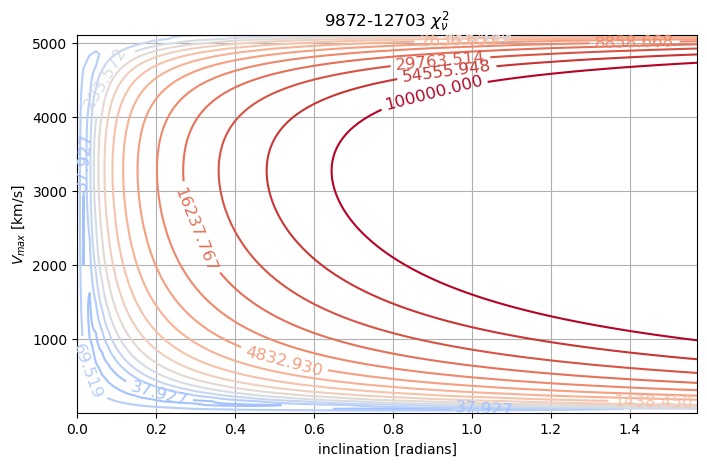

In [23]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
cs = ax.contour(inclination, v_max, chi2_norm, cmap='coolwarm', 
                    levels=np.logspace(0,5,20), 
                    norm=matplotlib.colors.LogNorm()
                   )
ax.clabel(cs, inline=True, fontsize=12)
ax.set(xlabel='inclination [radians]', ylabel=r'$V_{max}$ [km/s]')
#plt.xlim(0, 0.5*np.pi)
#plt.ylim(10,500)
plt.grid()
#fig.tight_layout()
plt.title(gals[0] + r' $\chi^2_\nu$')
plt.savefig(folder + gals[0] + '_chi2_contour.png')
plt.show()
#plt.close()

In [187]:
t[np.logical_and(t['v_max']>4000, t['WF50'] >0)]['plateifu', 'ba', 'v_max', 'nsa_elpetro_ba', 'chi2', 'WF50']

plateifu,ba,v_max,nsa_elpetro_ba,chi2,WF50
bytes32,float64,float64,float64,float64,float64
11025-3701,0.9169175042264636,5099.99999198857,0.69560426,4.986287053371122,91.68741393459614
12093-9101,0.9998999440468004,4938.297497981643,0.99745554,22.28921038053025,2886.1475936674656
12488-12702,0.4426081614956665,5099.996279202938,0.4610428,67.9546280123802,216.41286754680374
8083-12702,0.9136993128939952,5099.99543439381,0.153168,827.8074527083811,186.57283070730384
8139-12702,0.9955875167182516,5099.983034714926,0.607358,161.71959308162434,158.0070189619829
8144-6101,0.9806180815799266,5099.999814867845,0.932407,252.772187996865,392.574638611493
8148-1902,0.9996338928505556,4134.488527702943,0.995612,296.9782136169578,3643.707425187959
8250-12704,0.986072660727449,4533.006266691752,0.631069,6447.677393546542,440.9680666957384
8336-12704,0.9421068046628952,4650.23070792868,0.87556,22.267979491512953,980.9304779280508


In [41]:
t[t['plateifu'] == gals[0]]['chi2']

129.5915116999348


In [43]:
np.min(chi2_norm)

5521.849999221156